scale = 0.1
[<PIL.Image.Image image mode=L size=800x450 at 0x1196AA430>, <PIL.Image.Image image mode=L size=800x450 at 0x10F6E28B0>, <PIL.Image.Image image mode=L size=800x450 at 0x1196AAE50>]


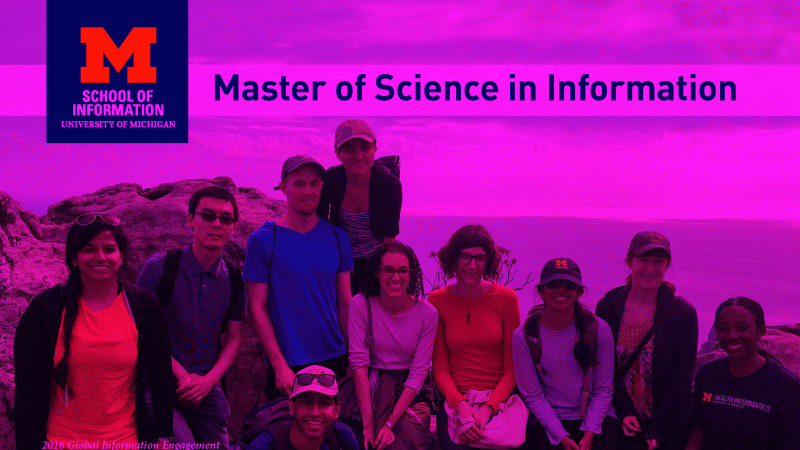

scale = 0.5
[<PIL.Image.Image image mode=L size=800x450 at 0x1193E39D0>, <PIL.Image.Image image mode=L size=800x450 at 0x11928CF10>, <PIL.Image.Image image mode=L size=800x450 at 0x1193E39A0>]


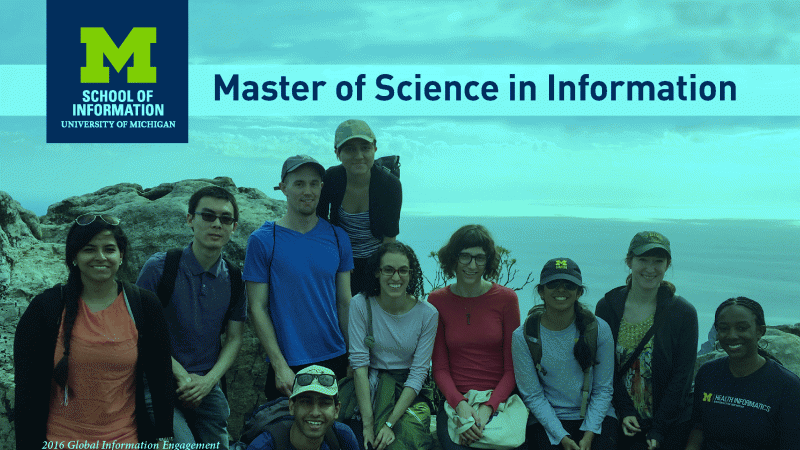

scale = 0.9
[<PIL.Image.Image image mode=L size=800x450 at 0x10F6E28B0>, <PIL.Image.Image image mode=L size=800x450 at 0x1193E31F0>, <PIL.Image.Image image mode=L size=800x450 at 0x1196E3EE0>]


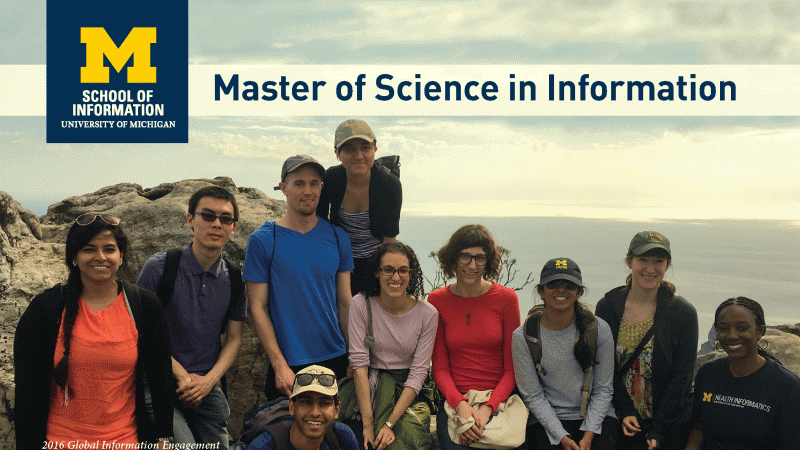

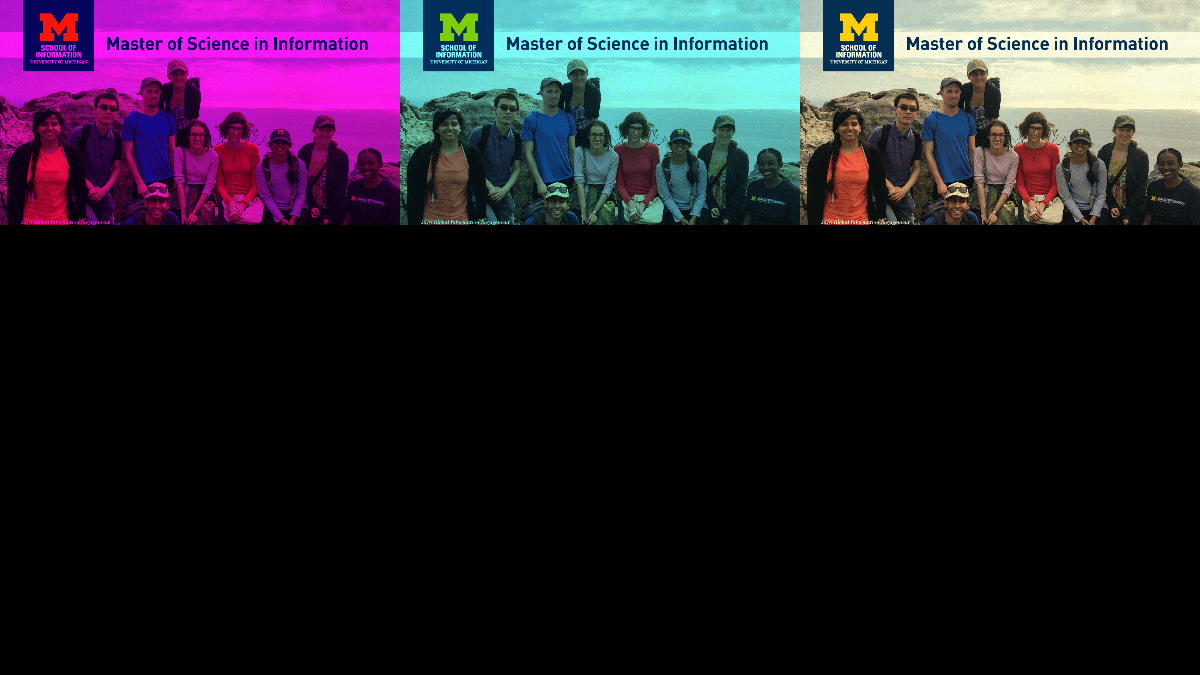

In [95]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')
# split the image into individual bands
source = image.split()
images = []

R, G, B = 0, 1, 2

out = []
intensity = 1
scale = intensity / 10.
print('scale =', scale)
out.append(source[R].point(lambda i: i * 1))
out.append(source[G].point(lambda i: i * scale))
out.append(source[B].point(lambda i: i * 1))

# build a new multiband image
newimage = Image.merge('RGB', (out[R], out[G], out[B]))
print(out)
display(newimage)
images.append(newimage) 

out = []
intensity = 5
scale = intensity / 10.
print('scale =', scale)
out.append(source[R].point(lambda i: i * scale))
out.append(source[G].point(lambda i: i * 1))
out.append(source[B].point(lambda i: i * 1))

# build a new multiband image
newimage = Image.merge('RGB', (out[R], out[G], out[B]))
print(out)
display(newimage)
images.append(newimage) 


out = []
intensity = 9
scale = intensity / 10.
print('scale =', scale)
out.append(source[R].point(lambda i: i * 1))
out.append(source[G].point(lambda i: i * 1))
out.append(source[B].point(lambda i: i * scale))

# build a new multiband image
newimage = Image.merge('RGB', (out[R], out[G], out[B]))
print(out)
display(newimage)
images.append(newimage) 


# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)
#display(image)